In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from webweb import Web
import matplotlib
import matplotlib.pyplot as plt

from collections import defaultdict

from src import load, analyse, plotting

In [2]:
prem = load.load_financial_transfer_networks()
champ = load.load_financial_transfer_networks(league="english_championship")

# Leicester

In [3]:
lcfc = 'leicester city'

# get network objects for prem and champ seasons with LCFC in them
champ_with_lcfc = {year: t for year, t in champ.items() if lcfc in t.league_clubs}
prem_with_lcfc = {year: t for year, t in prem.items() if lcfc in t.league_clubs}
all_with_lcfc = {**champ_with_lcfc, **prem_with_lcfc}
all_with_lcfc.keys()

dict_keys([2004, 2005, 2006, 2007, 2009, 2010, 2011, 2012, 2013, 2000, 2001, 2003, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [4]:
# get degrees for each network
lcfc_fees = pd.DataFrame(columns=["in fee", "out fee"])
start_year, end_year = 2009, 2020
for year in range(start_year, end_year + 1):
    t = all_with_lcfc.get(year)
    if t is not None:
        all_lcfc_in_fees = [data['fee'] for u, v, data in t.G.edges(data=True) if v == lcfc and data['fee'] > 0.0]
        all_lcfc_out_fees = [data['fee'] for u, v, data in t.G.edges(data=True) if u == lcfc and data['fee'] > 0.0]
        lcfc_fees.loc[year, 'in fee'] = 0 if not len(all_lcfc_in_fees) else np.mean(all_lcfc_in_fees)
        lcfc_fees.loc[year, 'out fee'] = 0 if not len(all_lcfc_out_fees) else np.mean(all_lcfc_out_fees)
    else:
        lcfc_fees.loc[year, "in fee"] = None
        lcfc_fees.loc[year, "out fee"] = None

lcfc_fees.head(12)

,in fee,out fee
2009,1.08,0.948333
2010,0.897,1.23525
2011,0.5605,1.55625
2012,1.332,1.04
2013,1.04,0.45
2014,0,4.564
2015,2.835,6.41571
2016,9.90833,13.74
2017,7.845,12.885
2018,21.555,14.7343


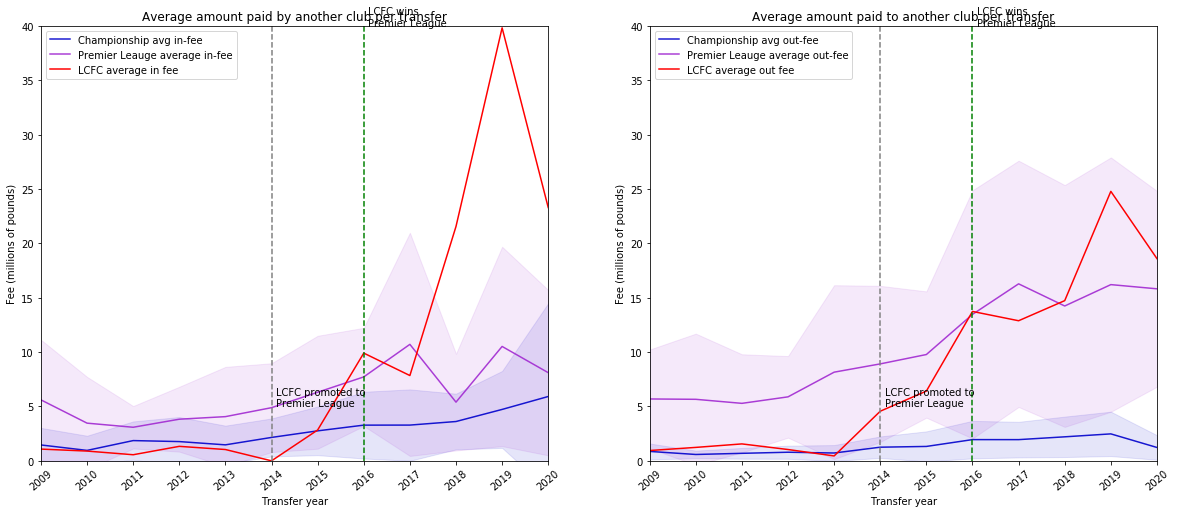

In [5]:
axes = plotting.plot_english_league_avg_fee(include_championship=True, start_year=start_year, end_year=end_year)
for i, deg in enumerate(['in', 'out']):
    axes[i].plot(lcfc_fees[f"{deg} fee"], label=f"LCFC average {deg} fee", color='red')
for ax in axes:
    ax.axvline(2016, linestyle='--', color='green')
    ax.axvline(2014, linestyle='--', color='grey')
    ax.text(2014.1, 5, 'LCFC promoted to \nPremier League')
    ax.text(2016.1, 40, 'LCFC wins \nPremier League')
    ax.legend()
    ax.set_ylim(0, 40)
plt.show()

# Notes
- Got paid much more after promoted to premier league
- Much much more valuable players after winning 
- ~double spending after promotion
- another doubling on spending after winning

# Top 4 vs Bottom 3

In [6]:
start_year, end_year = 2000, 2019
rankings = load.season_rankings_prem_league(start_year, end_year)
avg_fees_df = analyse.get_league_avg_transfer_fee(rankings=rankings, start_year=start_year, end_year=end_year)
avg_fees_df.head()

,Top 4 out,Top 4 in,Bottom 3 out,Bottom 3 in,avg out,avg in,std out,std in
2000,7.072478,3.820530,2.870167,2.170367,4.570738,3.184796,3.191036,2.483254
2001,9.275107,4.237733,2.277966,4.831667,5.740341,3.440358,3.740149,2.798042
2002,7.768833,1.589600,2.853667,0.022667,4.414014,1.696867,3.998009,2.761229
2003,6.876534,5.956500,0.769733,1.378917,2.995047,3.248263,3.540549,6.021926
2004,8.826483,4.747920,0.955208,1.315556,3.858689,2.720055,4.116272,2.203194


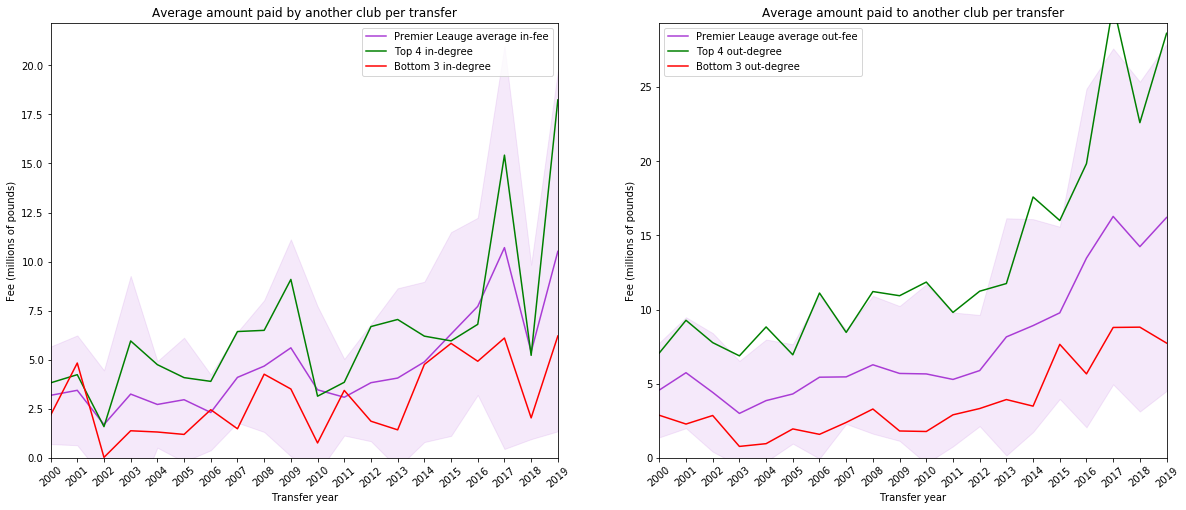

In [7]:
axes = plotting.plot_english_league_avg_fee(include_championship=False, start_year=start_year, end_year=end_year)
for i, deg in enumerate(['in', 'out']):
    axes[i].plot(avg_fees_df[f"Top 4 {deg}"], label=f"Top 4 {deg}-degree", color='green')
    axes[i].plot(avg_fees_df[f"Bottom 3 {deg}"], label=f"Bottom 3 {deg}-degree", color='red')
for ax in axes:
    ax.legend()
plt.show()

# Plotting any team against avg degrees

In [8]:
start_year, end_year = 2000, 2019

degrees_df = analyse.get_league_fees(start_year=start_year, end_year=end_year)

# print teams in prem for whole 20 years for reference
always_prem = degrees_df.dropna(axis='columns')
always_prem_teams = {c[:-10].strip() for c in always_prem.columns}
always_prem_teams

{'arsen',
 'arsena',
 'chels',
 'chelse',
 'evert',
 'everto',
 'liverpo',
 'liverpoo',
 'manchester unit',
 'manchester unite',
 'tottenh',
 'tottenha'}

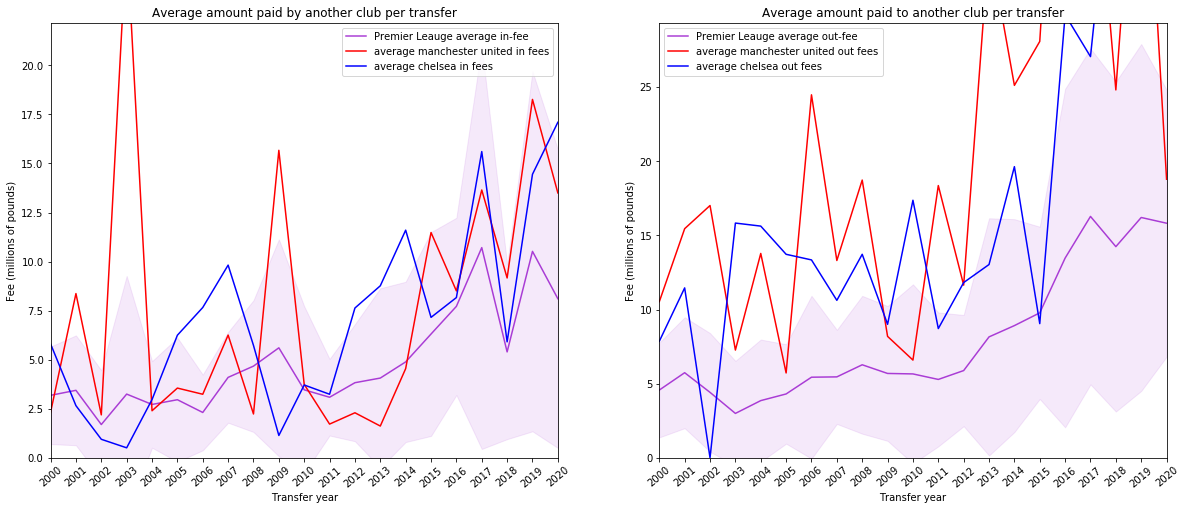

In [9]:
axes = plotting.plot_prem_teams_against_avg_fee(['manchester united', 'chelsea'], team_colors=['red', 'blue'])

plt.show()